In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append(os.path.abspath("../../src"))
sys.path.append(os.path.abspath("../../"))
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from pdf_utils.chains import (
    PDFLoaderChain, 
    PreprocessingChain,
    ImageLoaderChain,
    # VisionAnalysisChain
)
from textwrap import dedent

### Препроцессинг
Беру `.pdf` -> конвертирую в `.png` и складываю в папку `interim` 

In [ ]:
chain = (
    PDFLoaderChain()
    | PreprocessingChain()
)

# Словарь {`презентация`: [`пути до слайдов`]}
slides = chain.invoke(dict(pdf_folder="raw/weird-slides"))
slides

In [ ]:
# 1D-список слайдов 
slides_list = [s for slides_list in list(slides.values()) for s in slides_list]
slides_list

Переиспользую слайды с препроцессинга

In [4]:
from config.navigator import Navigator  

slides_list = list(Navigator().interim.rglob("*.png"))
slides_list

[PosixPath('/home/groot/Desktop/AITH/projects/PresRAG/presentation-rag/data/interim/SP_Навигатор_по_мерам_гос_поддержки_2024_74_стр copy_slides-2-9-51/slide_002.png'),
 PosixPath('/home/groot/Desktop/AITH/projects/PresRAG/presentation-rag/data/interim/SP_Навигатор_по_мерам_гос_поддержки_2024_74_стр copy_slides-2-9-51/slide_001.png'),
 PosixPath('/home/groot/Desktop/AITH/projects/PresRAG/presentation-rag/data/interim/SP_Навигатор_по_мерам_гос_поддержки_2024_74_стр copy_slides-2-9-51/slide_003.png'),
 PosixPath('/home/groot/Desktop/AITH/projects/PresRAG/presentation-rag/data/interim/Kept_Подвижной состав РФ_2024 (20 стр)_slides-1-10-11-17/slide_002.png'),
 PosixPath('/home/groot/Desktop/AITH/projects/PresRAG/presentation-rag/data/interim/Kept_Подвижной состав РФ_2024 (20 стр)_slides-1-10-11-17/slide_001.png'),
 PosixPath('/home/groot/Desktop/AITH/projects/PresRAG/presentation-rag/data/interim/Kept_Подвижной состав РФ_2024 (20 стр)_slides-1-10-11-17/slide_004.png'),
 PosixPath('/home/groo

Запуск пайплайна для одного слайда

In [11]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from pprint import pprint
from IPython.display import Image, display
import os

api_base = os.environ["VSEGPT_API_BASE"]
api_key = os.environ["VSEGPT_API_KEY"]
model = "vis-openai/gpt-4o"
temperature = 0.0

image_path = slides_list[0]

llm = ChatOpenAI(
    base_url=api_base,
    model=model,
    api_key=api_key,
    temperature=temperature
)


prompt = ChatPromptTemplate.from_messages([
    ("human", [
        {"type": "text", "text": "{prompt}"},
        {
            "type": "image",
            "image_url": "data:image/png;base64,{image}"
        }
    ])
])

chain = (
    ImageLoaderChain()
    | prompt
    | llm
    | StrOutputParser()

)

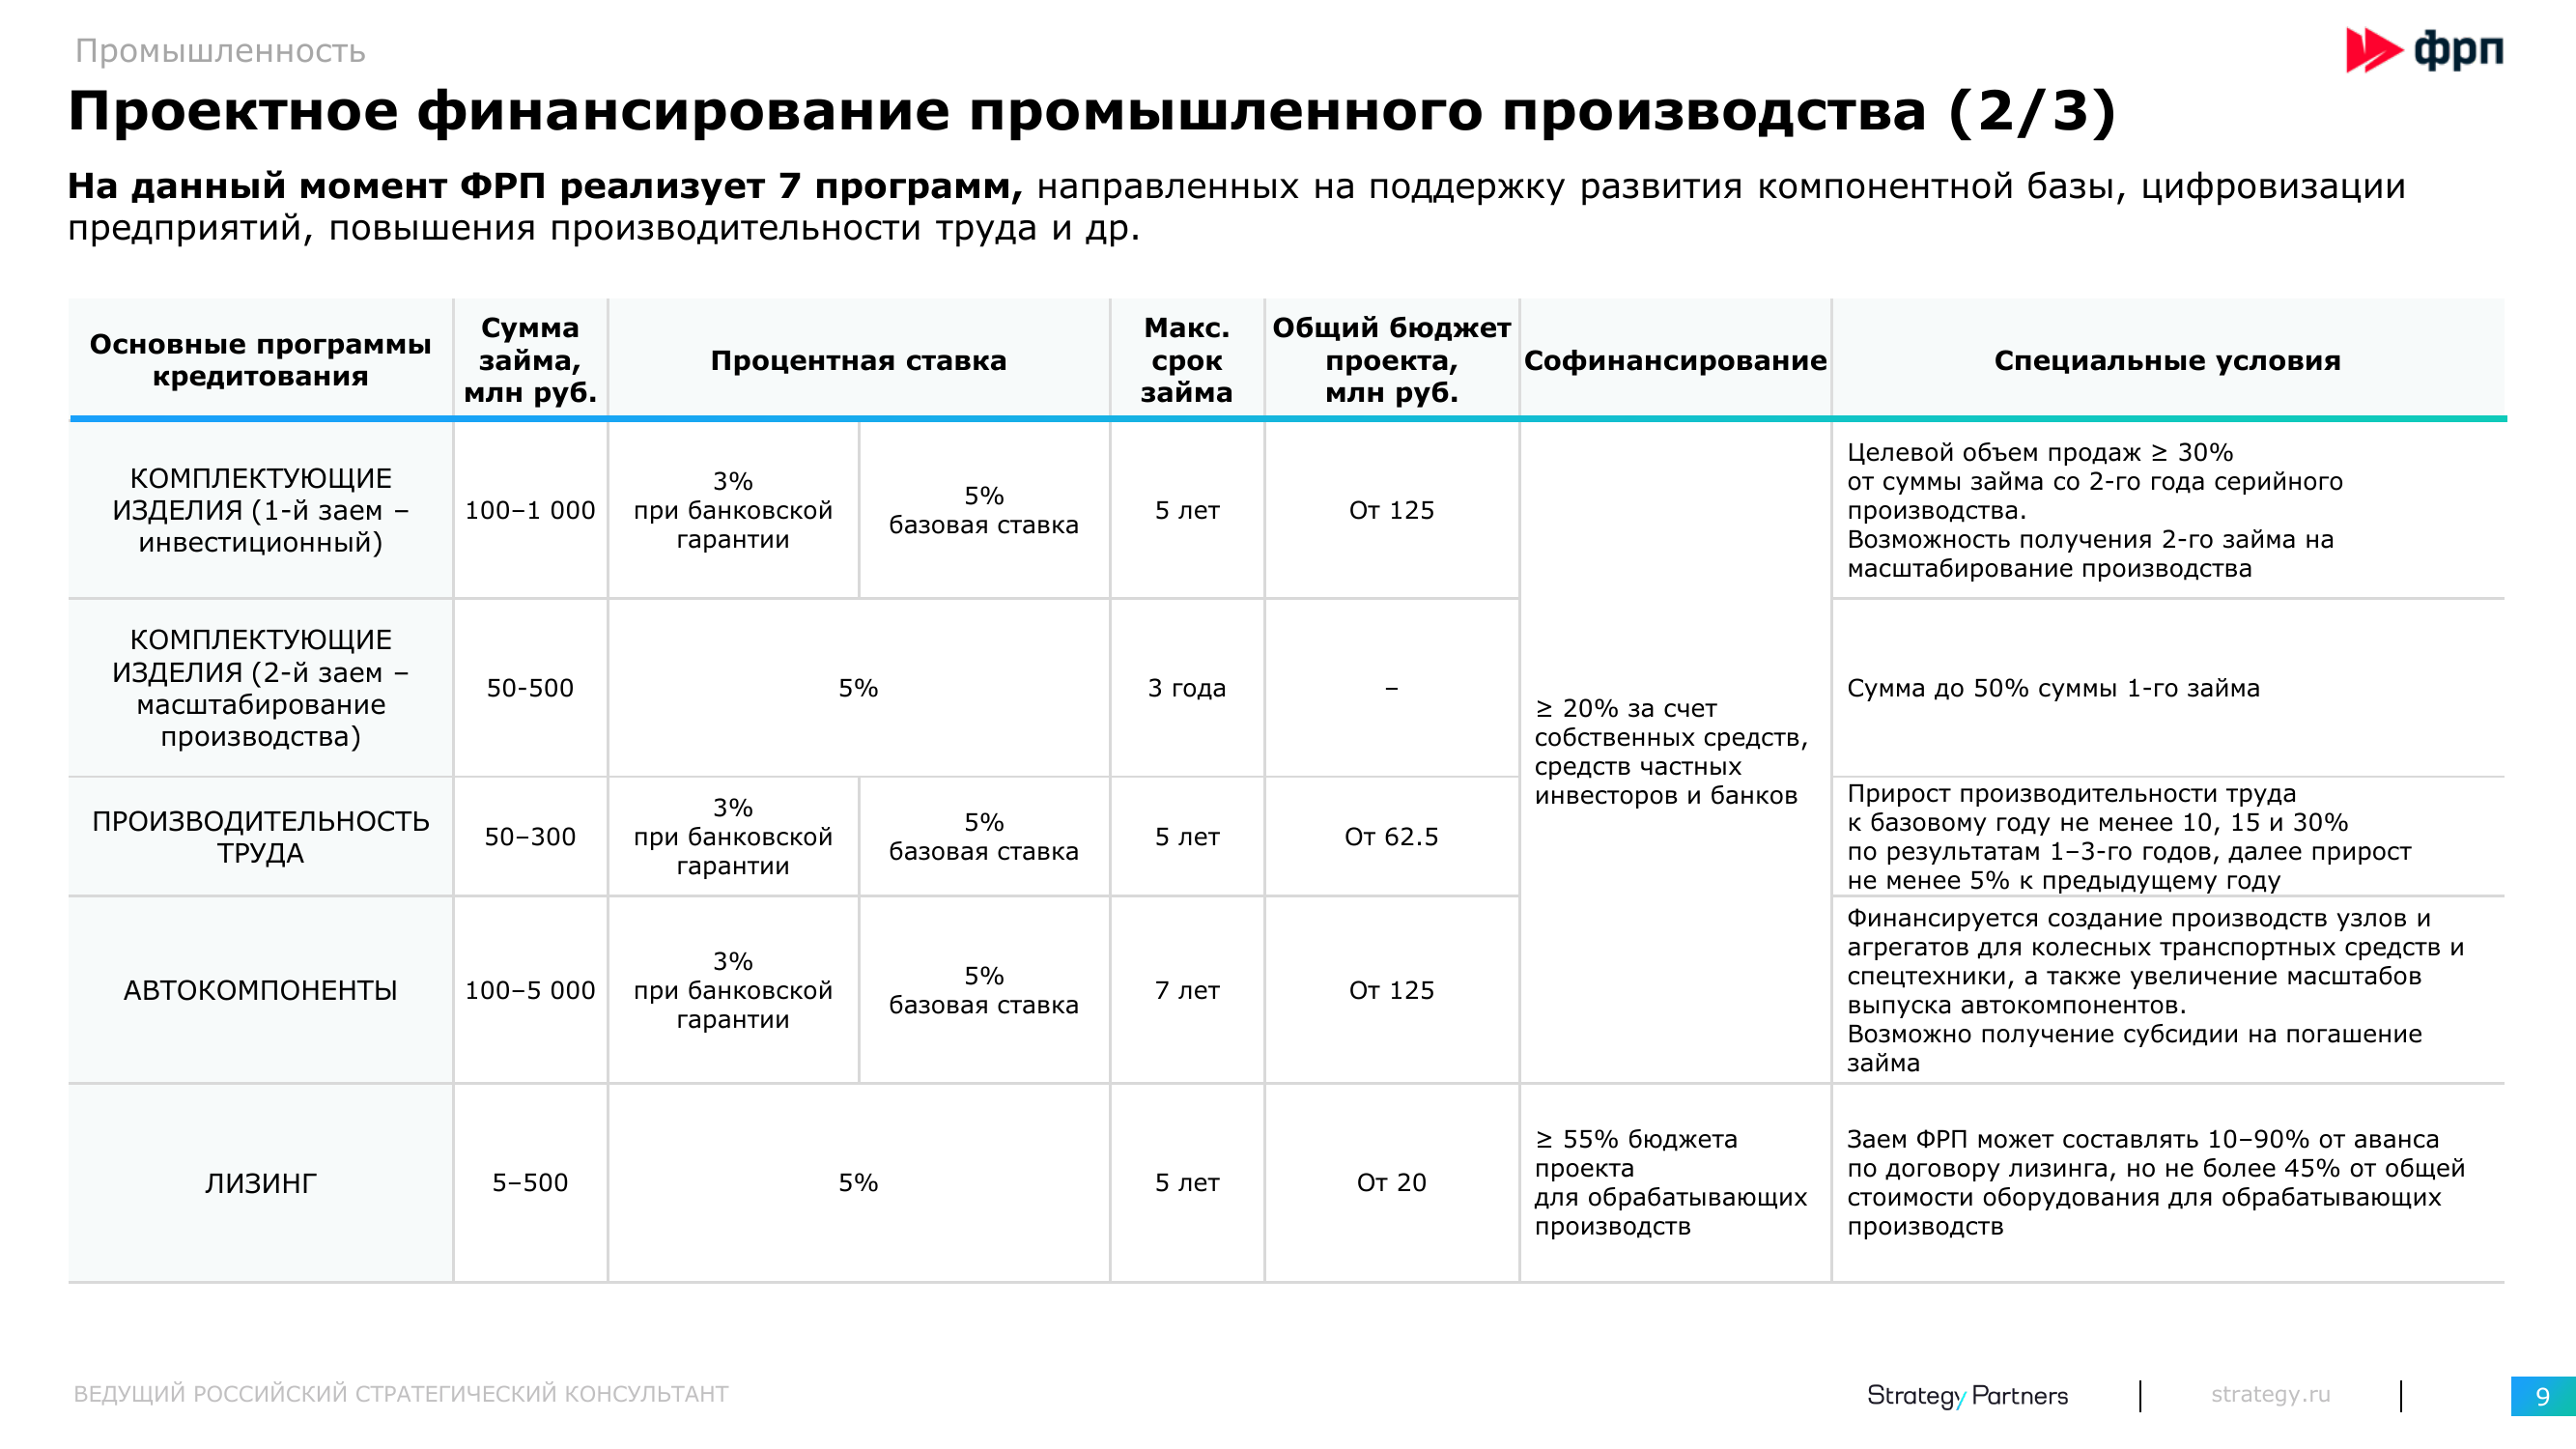

('На слайде представлена информация о проектном финансировании промышленного '
 'производства, реализуемом Фондом развития промышленности (ФРП). Указаны '
 'основные программы кредитования, сумма займа, процентная ставка, '
 'максимальный срок займа, общий бюджет проекта, условия софинансирования и '
 'специальные условия.\n'
 '\n'
 '1. **Комплектующие изделия (1-й заем – инвестиционный)**:\n'
 '   - Сумма займа: 100–1 000 млн руб.\n'
 '   - Процентная ставка: 3% при банковской гарантии, 5% базовая ставка\n'
 '   - Срок: 5 лет\n'
 '   - Бюджет: от 125 млн руб.\n'
 '   - Спецусловия: Целевой объем продаж ≥ 30% от суммы займа со 2-го года '
 'серийного производства.\n'
 '\n'
 '2. **Комплектующие изделия (2-й заем – масштабирование производства)**:\n'
 '   - Сумма займа: 50–500 млн руб.\n'
 '   - Процентная ставка: 5%\n'
 '   - Срок: 3 года\n'
 '   - Спецусловия: Сумма до 50% суммы 1-го займа.\n'
 '\n'
 '3. **Производительность труда**:\n'
 '   - Сумма займа: 50–300 млн руб.\n'
 '   - Про

In [32]:
out = chain.invoke(dict(
    image_path=image_path, 
    prompt="Опиши информацию на слайде"
))
display(Image(filename=image_path))
pprint(out)

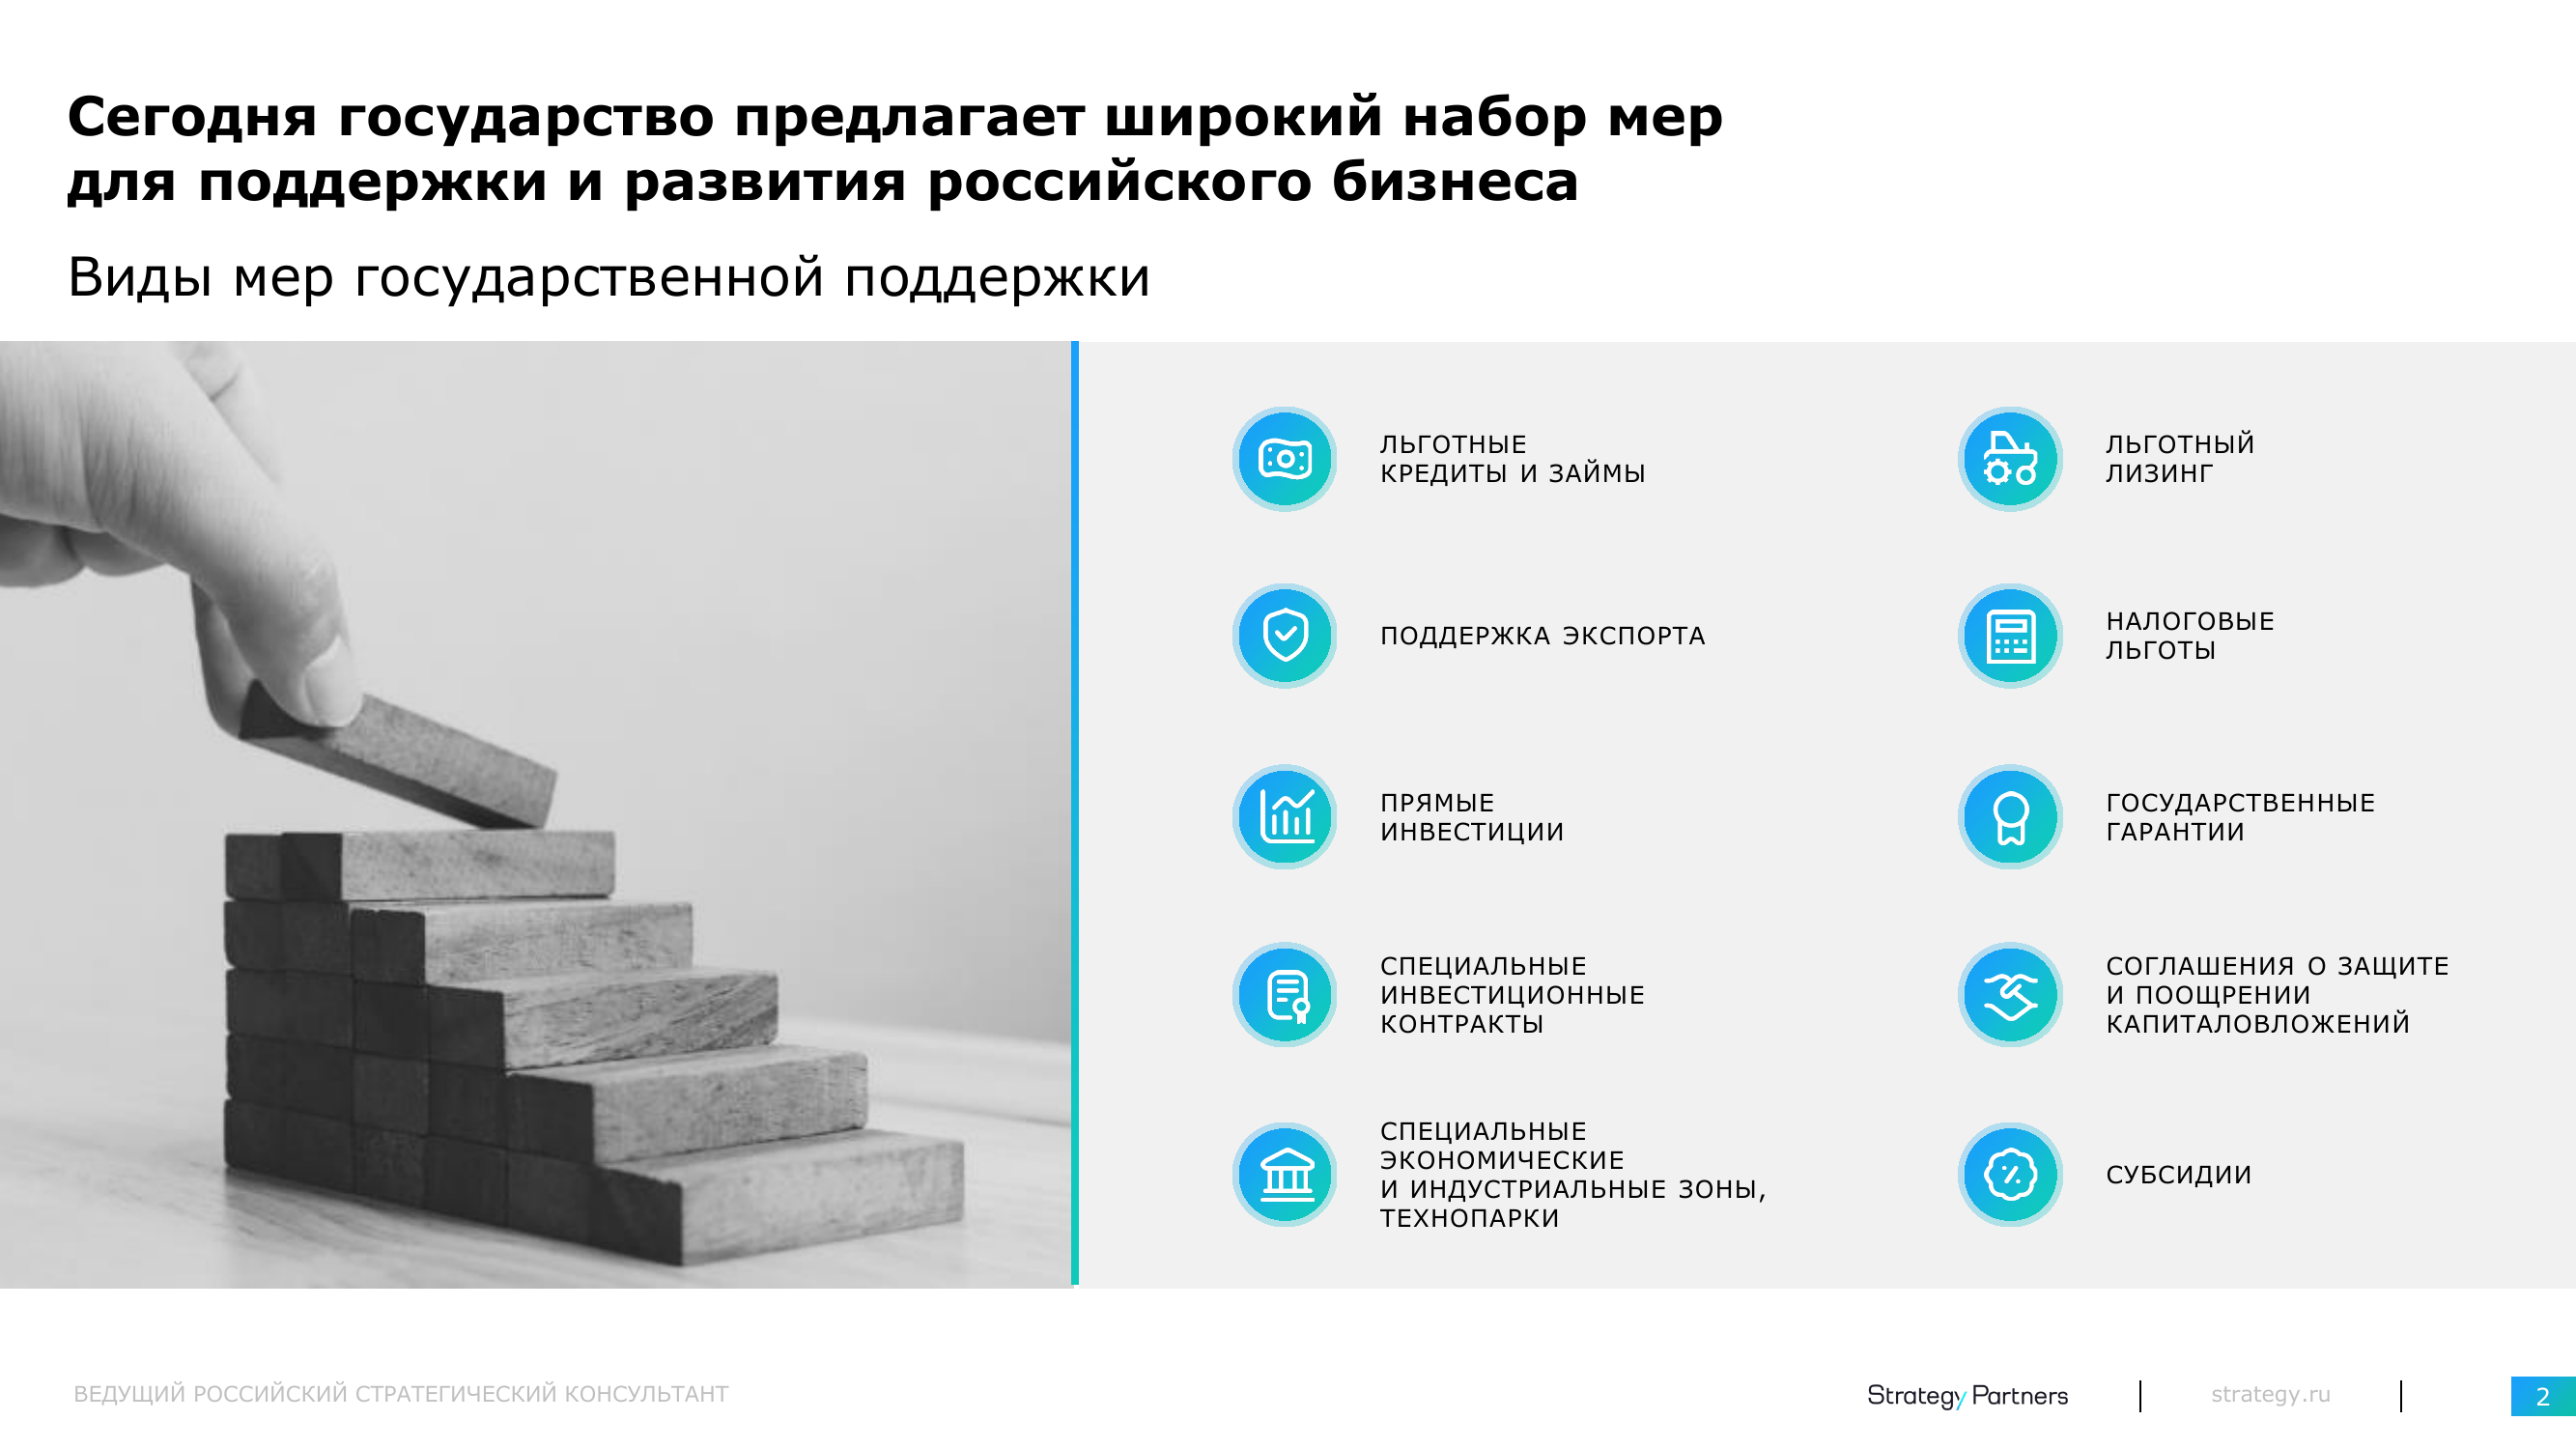

('Слайд содержит информацию о мерах государственной поддержки для развития '
 'российского бизнеса. \n'
 '\n'
 '### Заголовок:\n'
 '- **Сегодня государство предлагает широкий набор мер для поддержки и '
 'развития российского бизнеса**\n'
 '- **Виды мер государственной поддержки**\n'
 '\n'
 '### Изображение:\n'
 '- Слева изображена рука, которая кладет деревянный брусок на ступеньки, '
 'сложенные из таких же брусков. Изображение черно-белое.\n'
 '\n'
 '### Список мер поддержки (справа):\n'
 '1. **Льготные кредиты и займы** (иконка с изображением денег)\n'
 '2. **Поддержка экспорта** (иконка с изображением щита)\n'
 '3. **Прямые инвестиции** (иконка с графиком)\n'
 '4. **Специальные инвестиционные контракты** (иконка с документом)\n'
 '5. **Специальные экономические и индустриальные зоны, технопарки** (иконка с '
 'изображением здания)\n'
 '6. **Льготный лизинг** (иконка с автомобилем)\n'
 '7. **Налоговые льготы** (иконка с калькулятором)\n'
 '8. **Государственные гарантии** (иконка с 

In [35]:
image_path = slides_list[1]
out = chain.invoke(dict(
    image_path=image_path, 
    prompt=dedent("""\
        Представь, что я ничего не вижу. \
        Я пришлю тебе слайд из презентации, а ты опиши его. \
        Передай мне содержимое слайда в мельчайших подробностях.
        """
    )
))
display(Image(filename=image_path))
pprint(out)

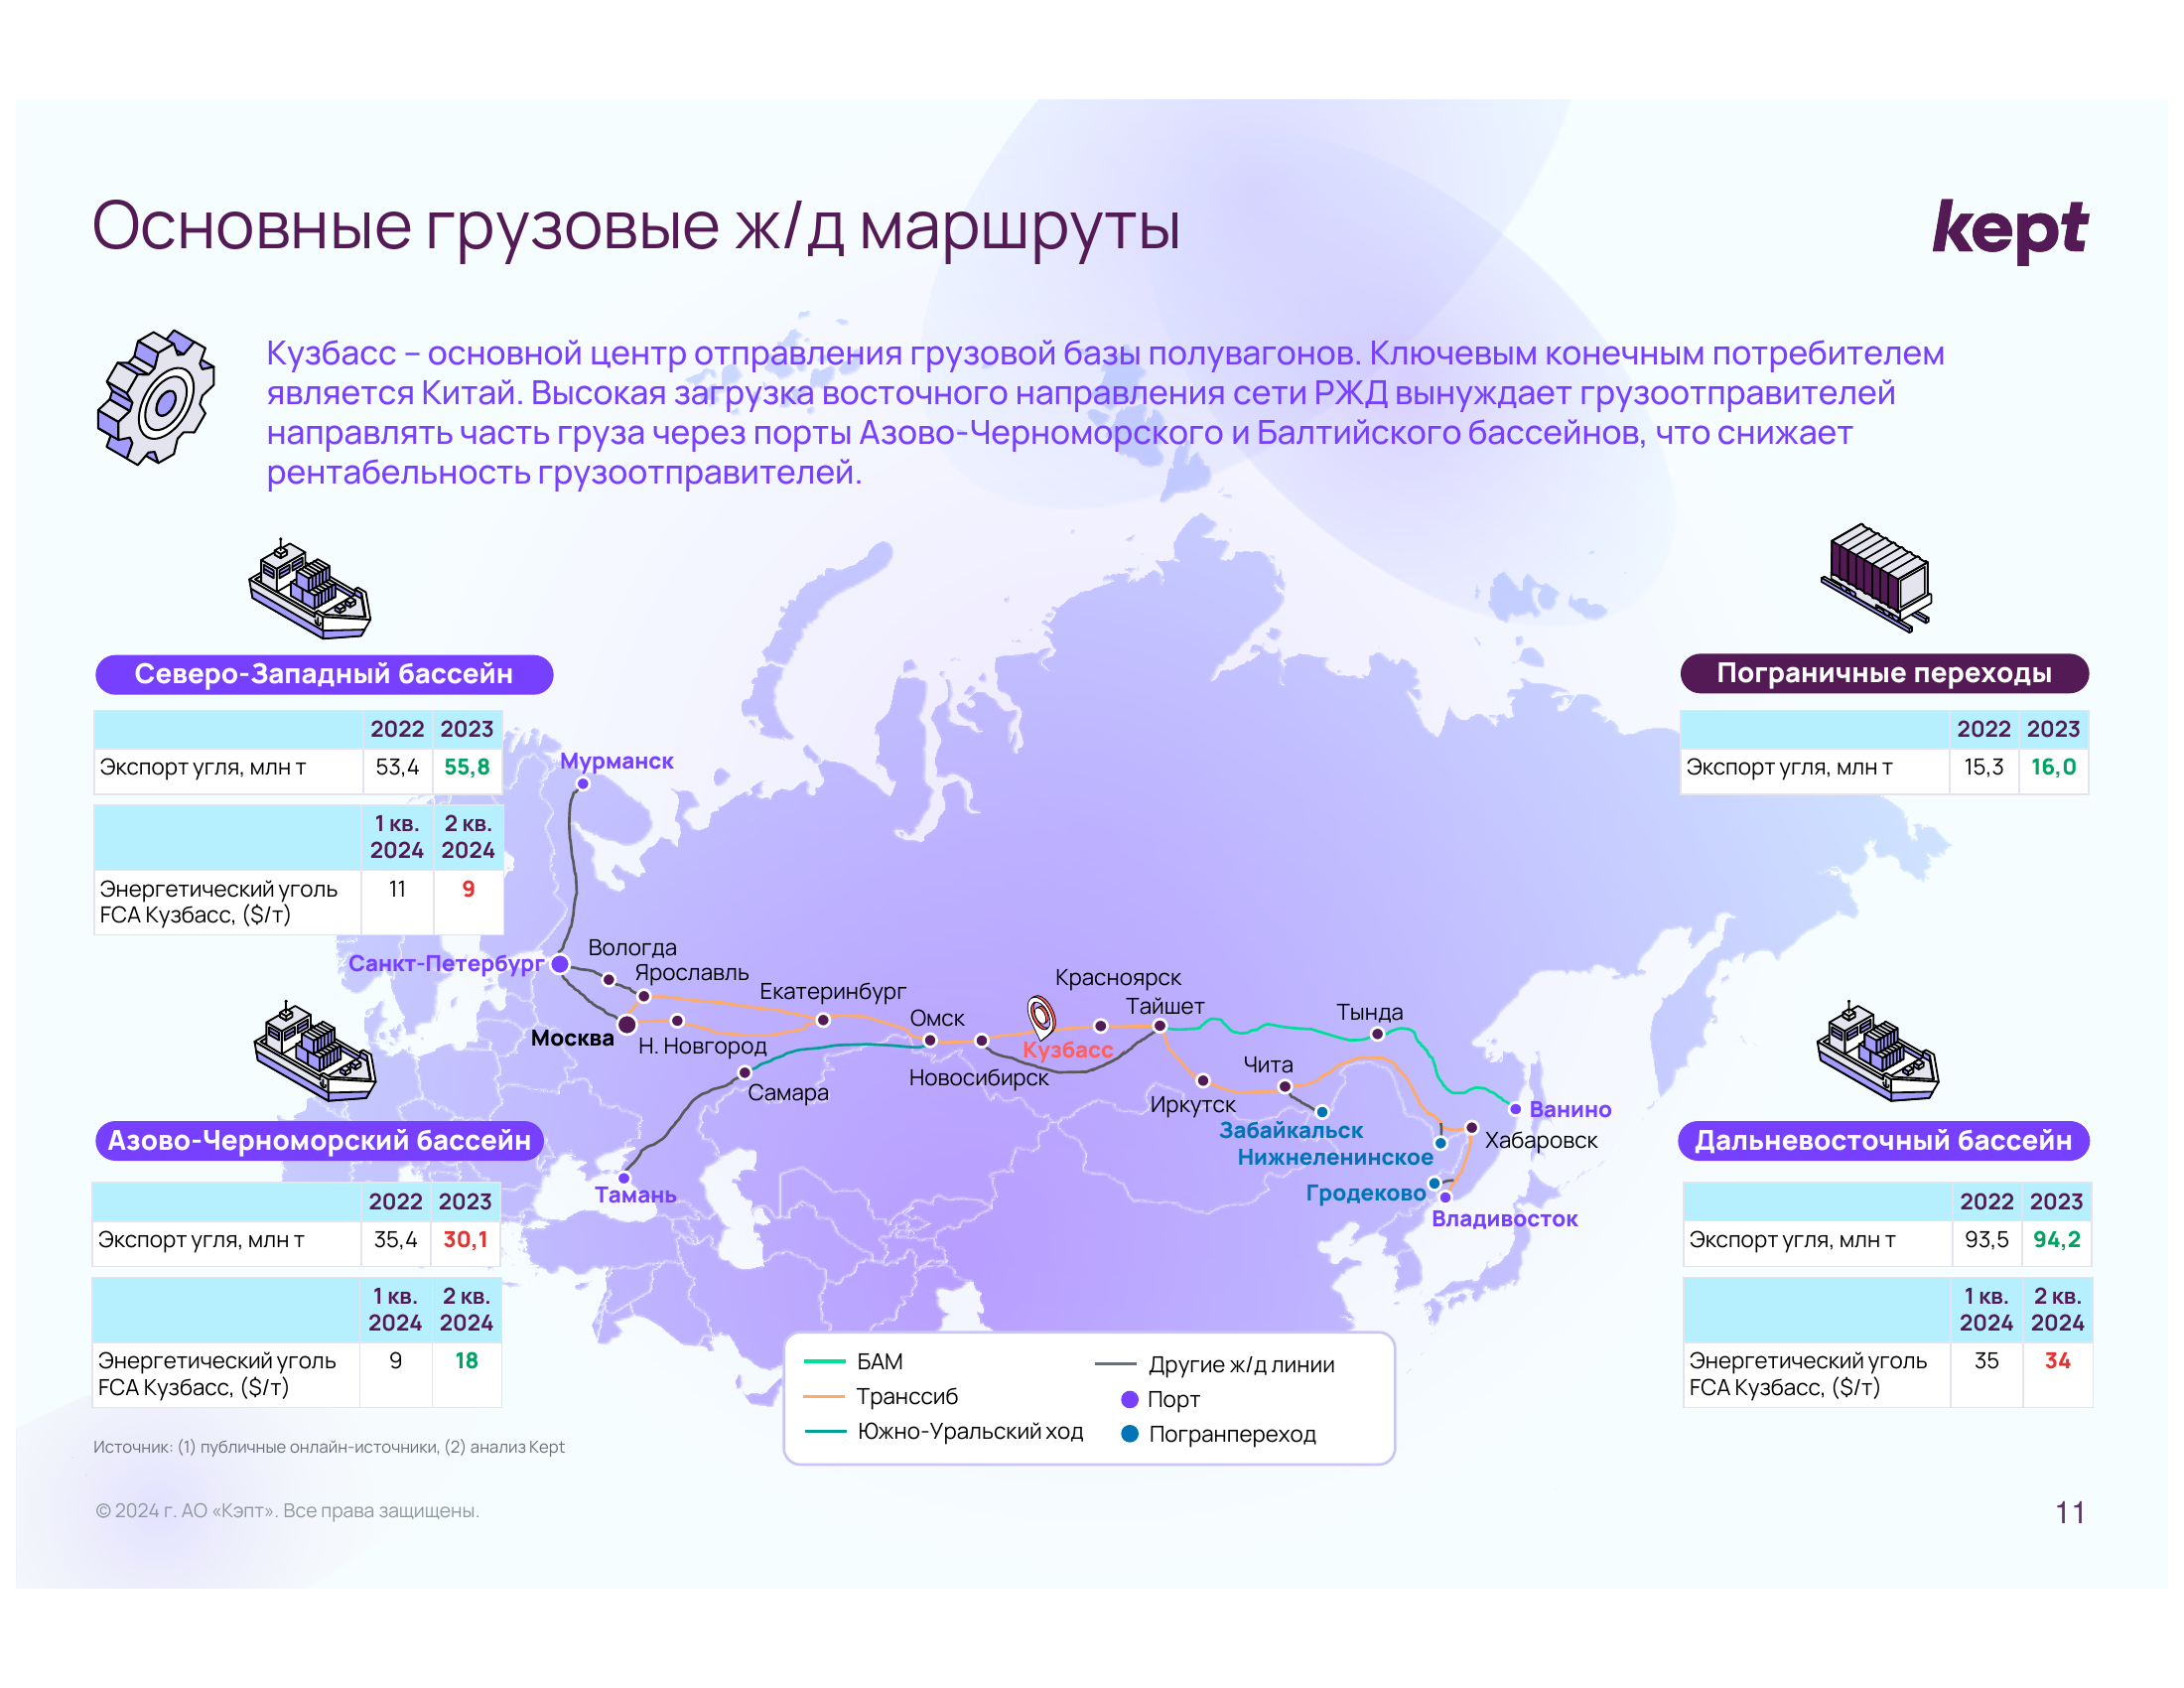

('Слайд посвящён основным грузовым железнодорожным маршрутам. В центре '
 'находится карта России с обозначенными маршрутами и ключевыми точками. \n'
 '\n'
 '### Заголовок:\n'
 '- **Основные грузовые ж/д маршруты**\n'
 '\n'
 '### Текст:\n'
 '- **Кузбасс** — основной центр отправления грузовой базы полувагонов. '
 'Ключевым конечным потребителем является Китай. Высокая загрузка восточного '
 'направления сети РЖД вынуждает грузоотправителей направлять часть груза '
 'через порты Азово-Черноморского и Балтийского бассейнов, что снижает '
 'рентабельность грузоотправителей.\n'
 '\n'
 '### Карта:\n'
 '- На карте отмечены маршруты:\n'
 '  - **БАМ** (Бирюзовая линия)\n'
 '  - **Транссиб** (Зелёная линия)\n'
 '  - **Южно-Уральский ход** (Оранжевая линия)\n'
 '  - Другие ж/д линии (Серая линия)\n'
 '- Обозначены порты и погранпереходы.\n'
 '\n'
 '### Бассейны:\n'
 '1. **Северо-Западный бассейн**:\n'
 '   - Экспорт угля, млн т: 2022 — 53,4; 2023 — 55,8\n'
 '   - Энергетический уголь FCA Кузбасс

In [41]:
image_path = slides_list[6]
out = chain.invoke(dict(
    image_path=image_path, 
    prompt=dedent("""\
        Представь, что я ничего не вижу. \
        Я пришлю тебе слайд из презентации, а ты опиши его. \
        Передай мне содержимое слайда в мельчайших подробностях.
        """
    )
))
display(Image(filename=image_path))
pprint(out)

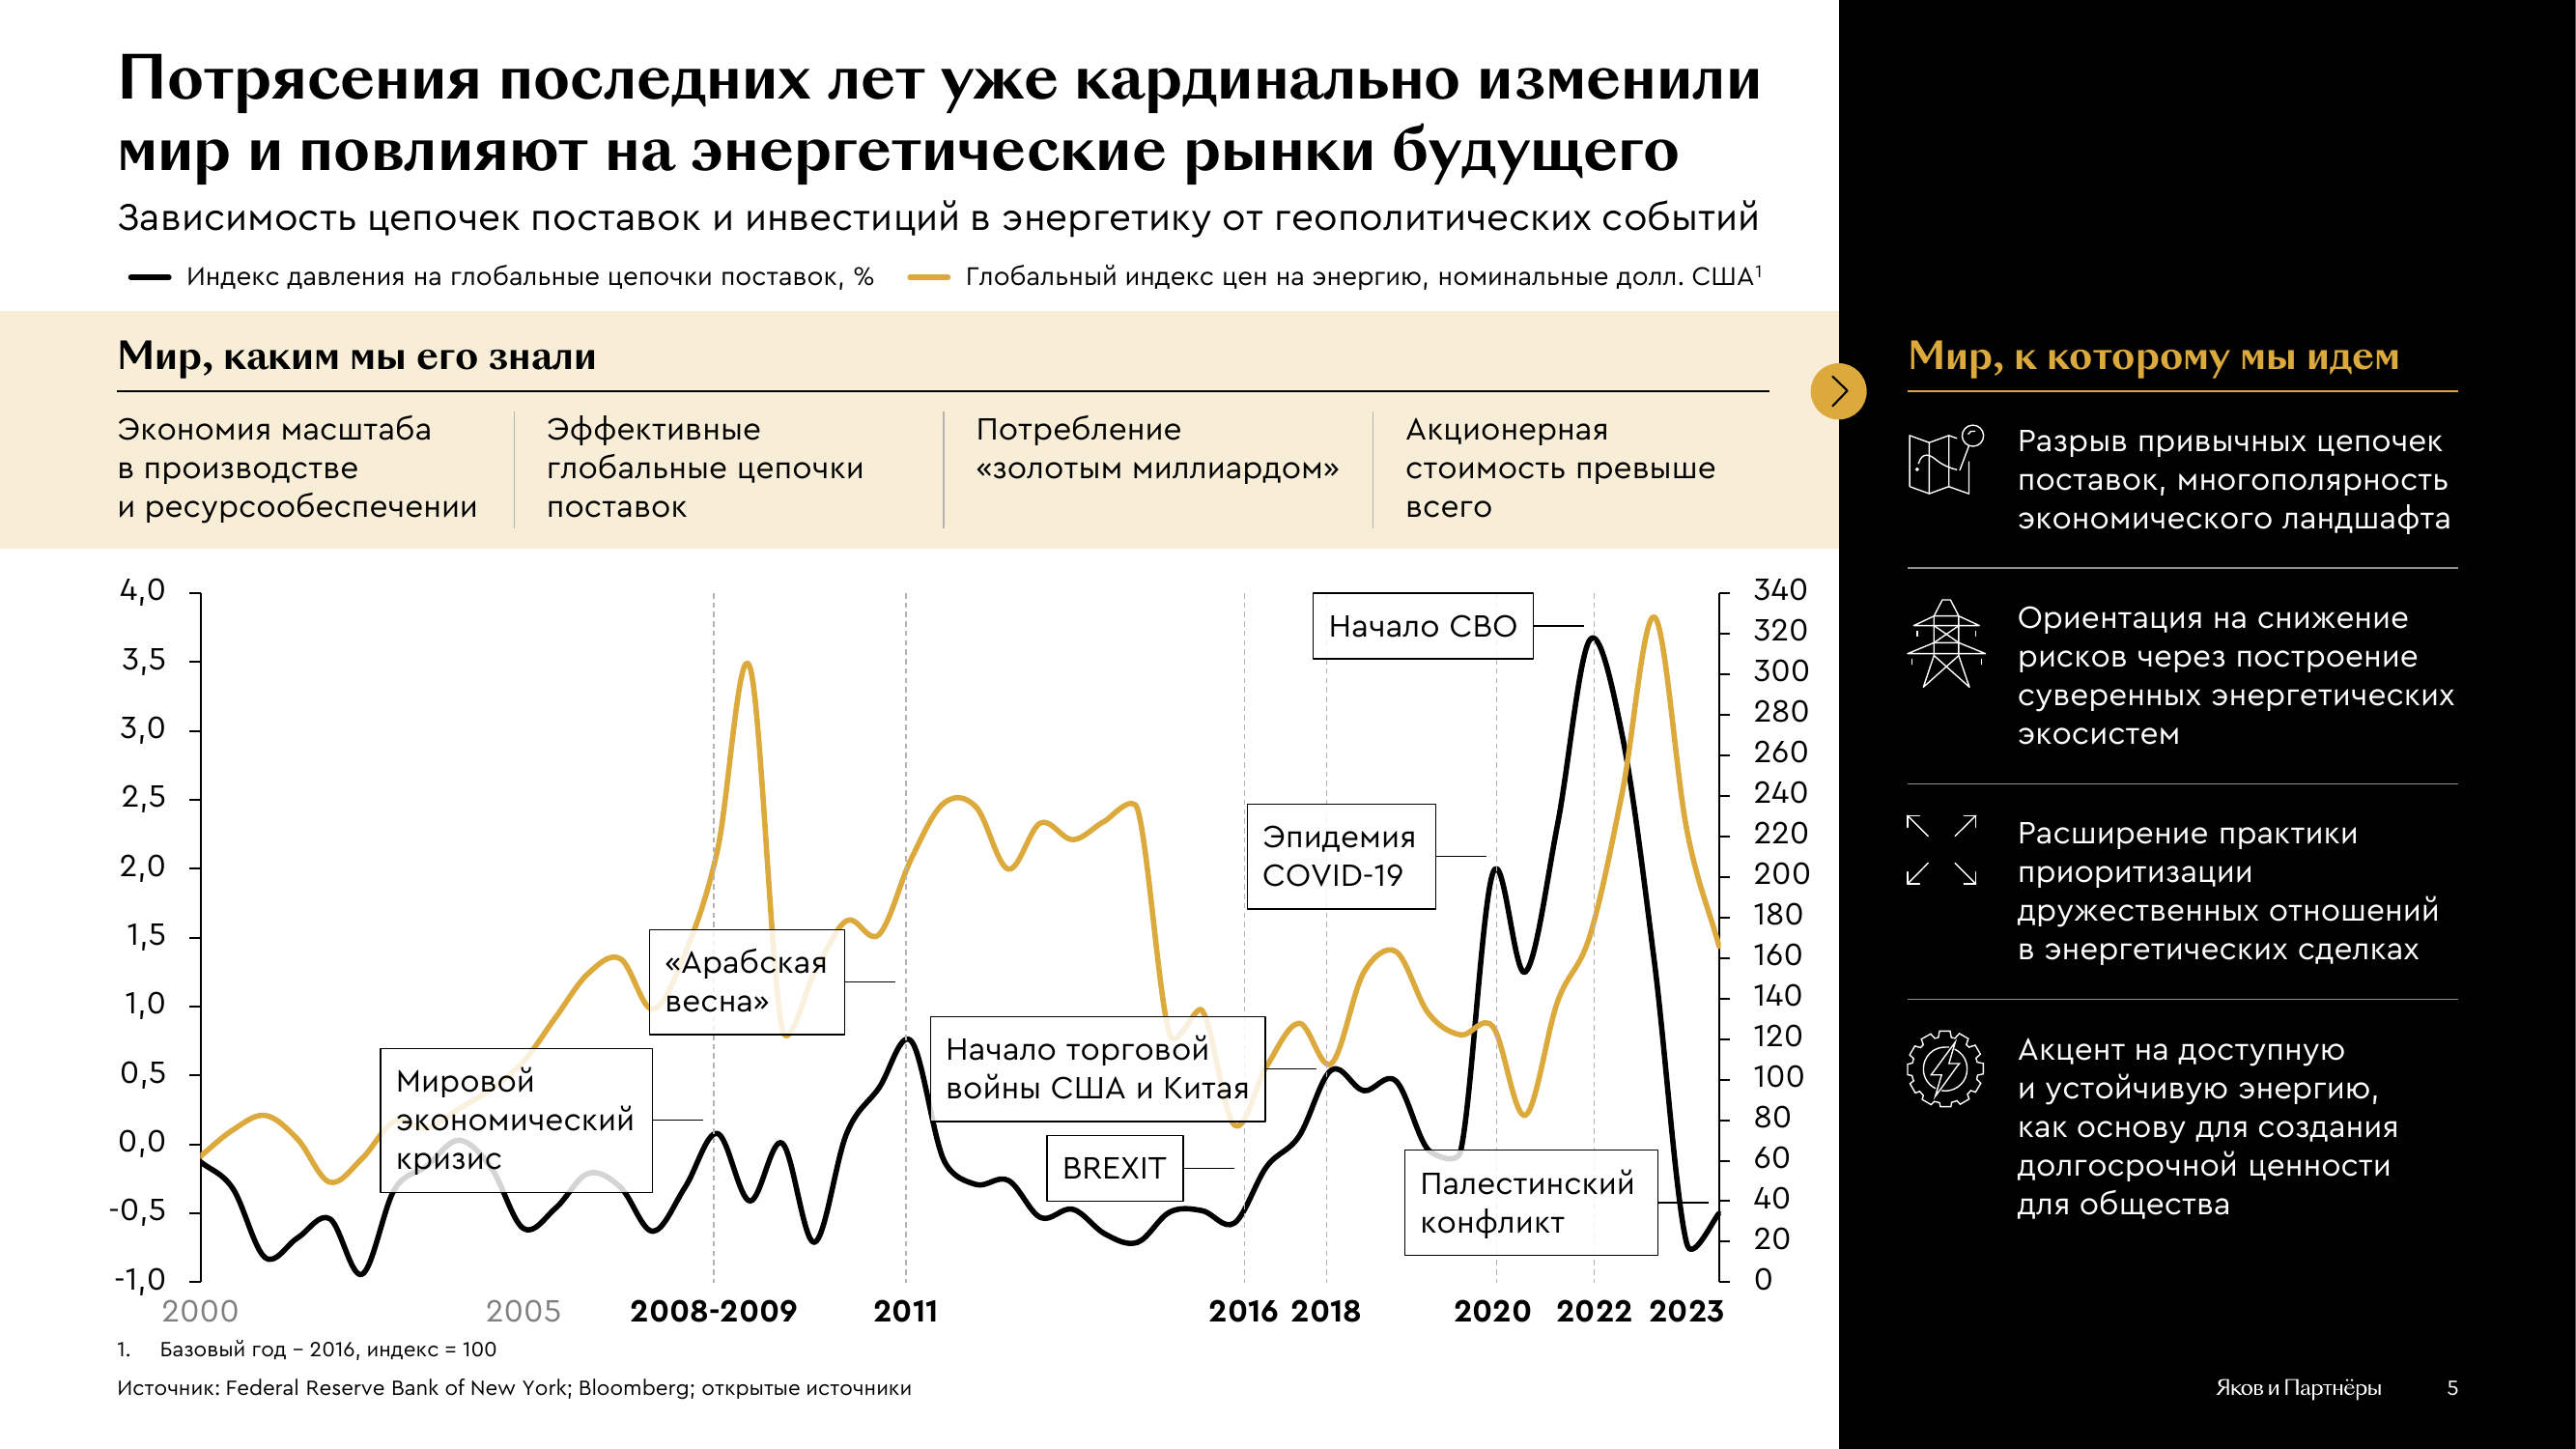

('Слайд содержит заголовок и график, а также текстовые блоки с пояснениями.\n'
 '\n'
 '**Заголовок:**\n'
 '"Потрясения последних лет уже кардинально изменили мир и повлияют на '
 'энергетические рынки будущего."\n'
 '\n'
 '**Подзаголовок:**\n'
 '"Зависимость цепочек поставок и инвестиций в энергетику от геополитических '
 'событий."\n'
 '\n'
 '**График:**\n'
 '- Две линии: черная (индекс давления на глобальные цепочки поставок, %) и '
 'оранжевая (глобальный индекс цен на энергию, номинальные доллары США).\n'
 '- Временной диапазон: 2000-2023 годы.\n'
 '- Основные события, отмеченные на графике:\n'
 '  - Мировой экономический кризис\n'
 '  - "Арабская весна"\n'
 '  - Начало торговой войны США и Китая\n'
 '  - BREXIT\n'
 '  - Эпидемия COVID-19\n'
 '  - Начало СВО\n'
 '  - Палестинский конфликт\n'
 '\n'
 '**Левая часть:**\n'
 '"Мир, каким мы его знали":\n'
 '- Экономия масштаба в производстве и ресурсоснабжении\n'
 '- Эффективные глобальные цепочки поставок\n'
 '- Потребление "золотым ми

In [44]:
image_path = slides_list[11]
out = chain.invoke(dict(
    image_path=image_path, 
    prompt=dedent("""\
        Представь, что я ничего не вижу. \
        Я пришлю тебе слайд из презентации, а ты опиши его. \
        Передай мне содержимое слайда в мельчайших подробностях.
        """
    )
))
display(Image(filename=image_path))
pprint(out)

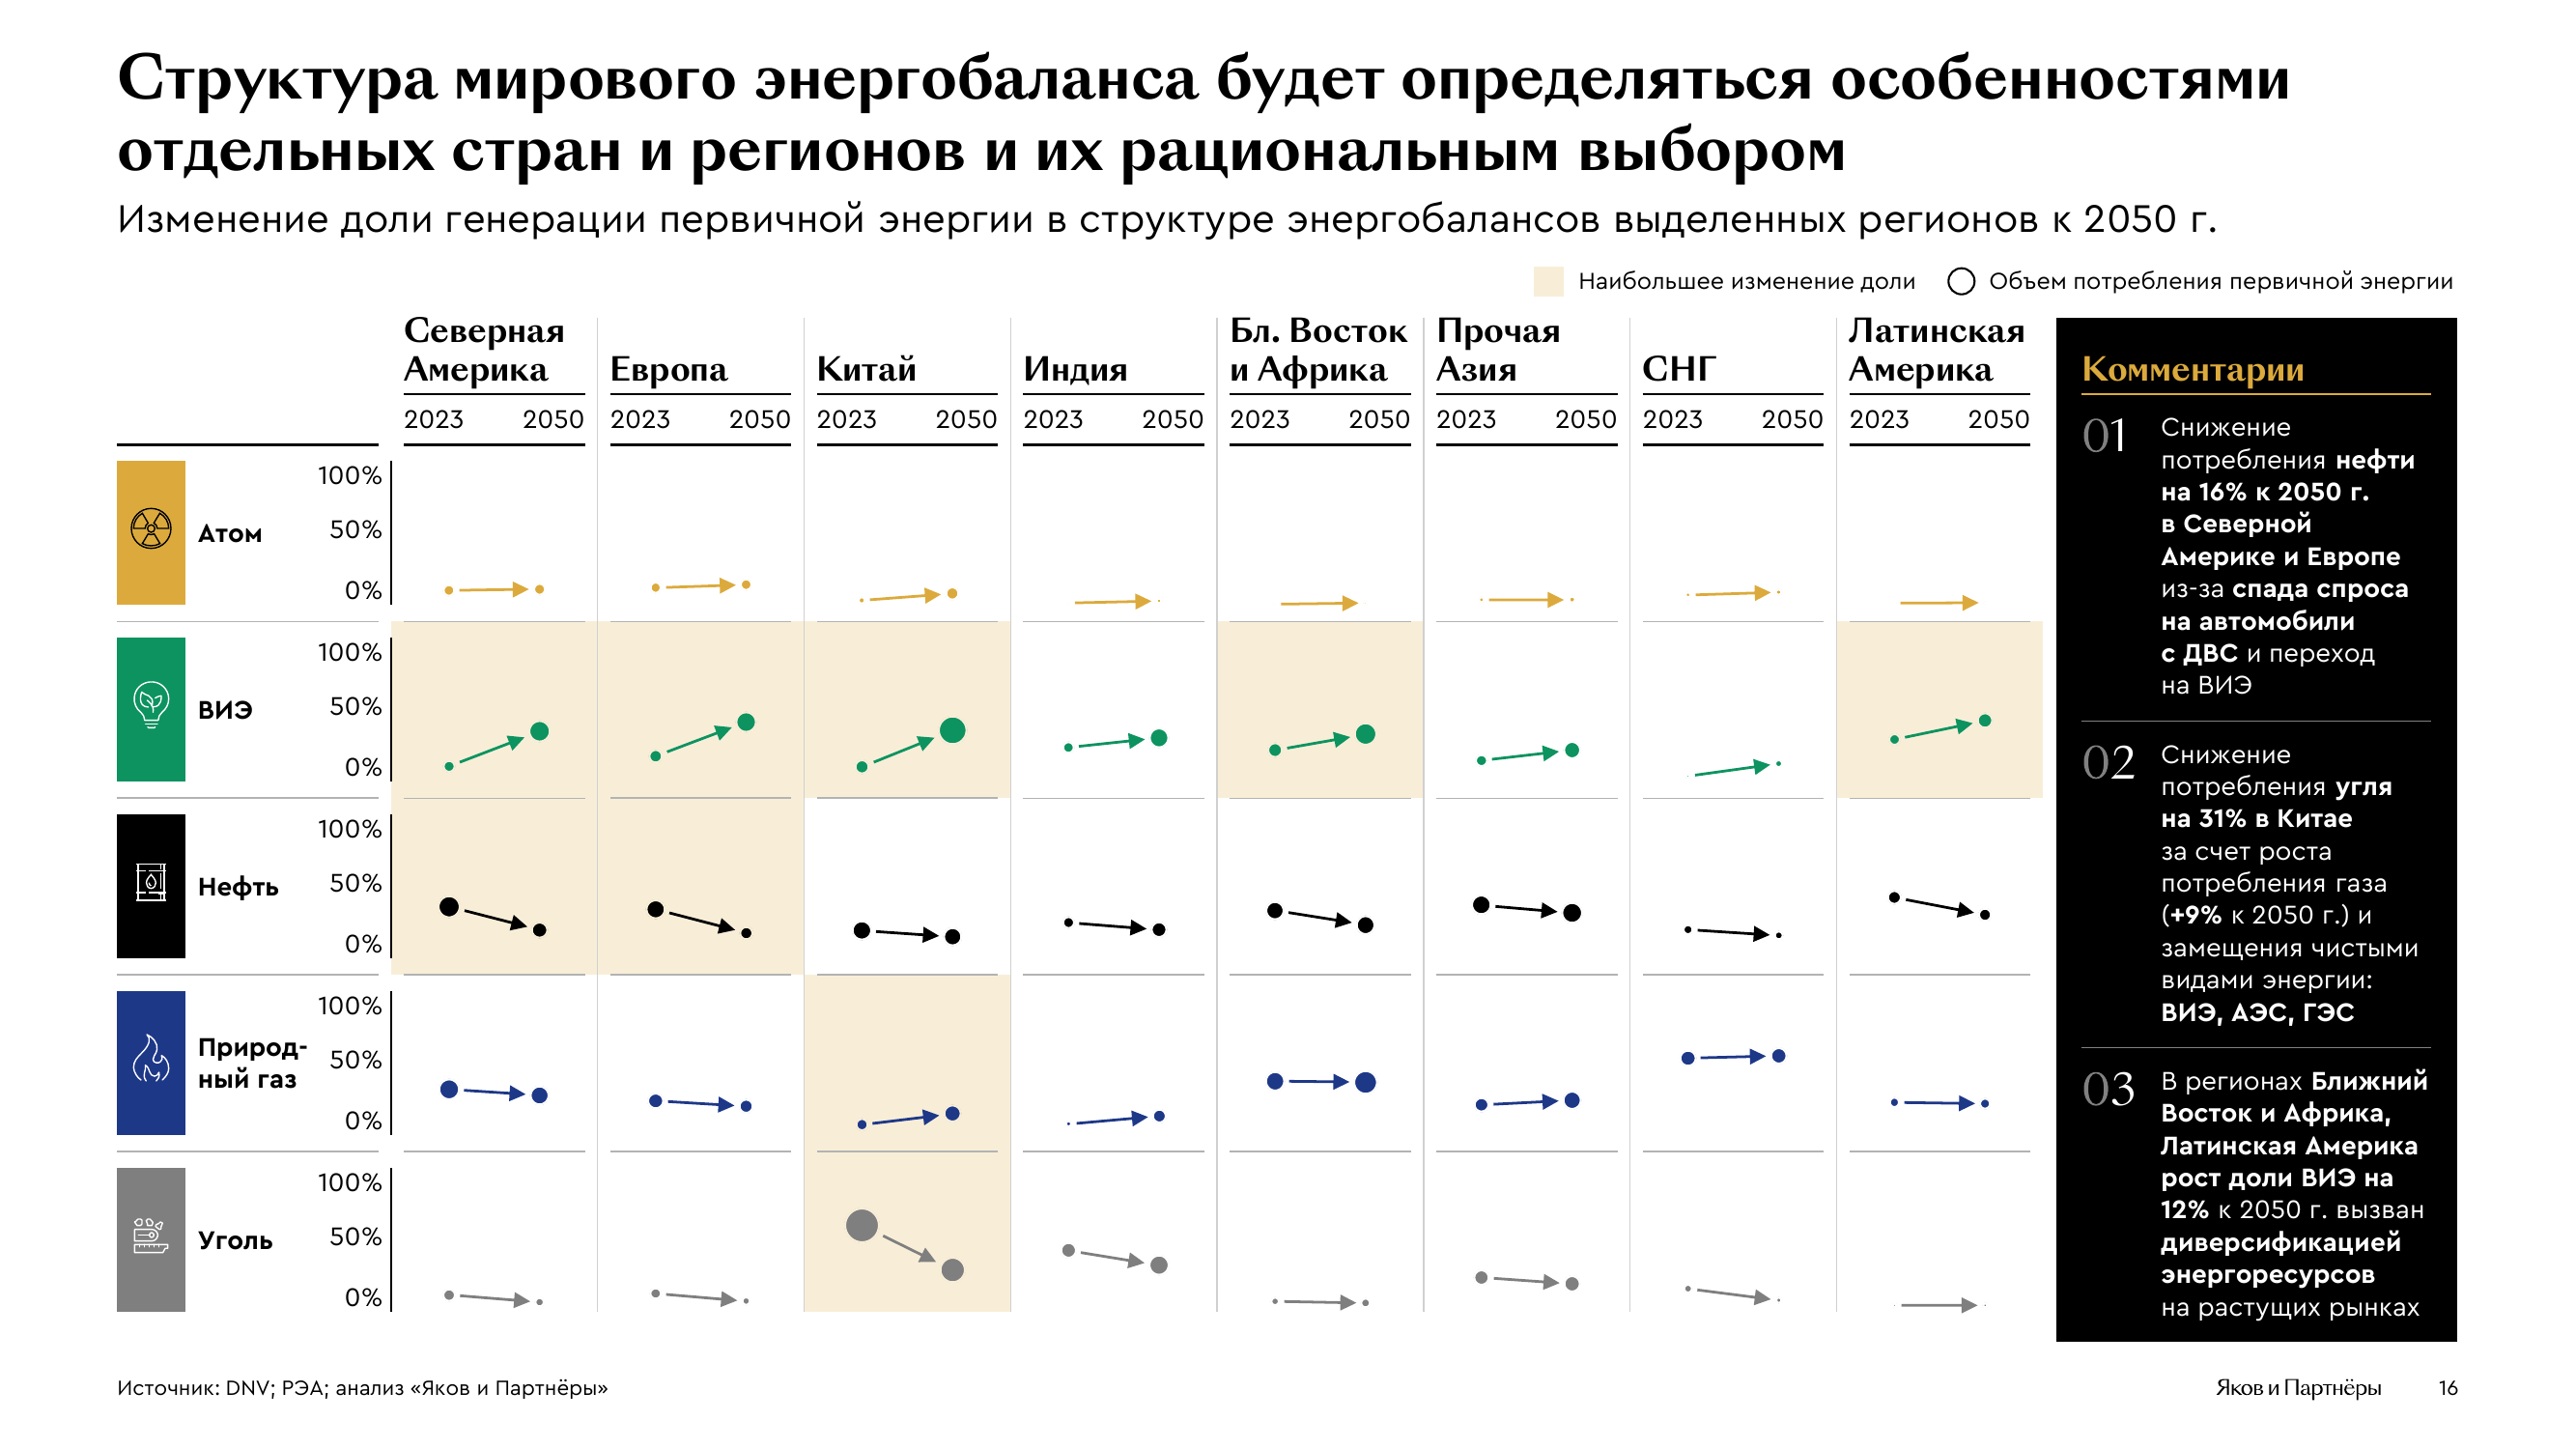

('Слайд представляет собой таблицу, показывающую изменения в структуре '
 'мирового энергобаланса по регионам к 2050 году. \n'
 '\n'
 '### Заголовок:\n'
 '- **Структура мирового энергобаланса будет определяться особенностями '
 'отдельных стран и регионов и их рациональным выбором.**\n'
 '- Подзаголовок: Изменение доли генерации первичной энергии в структуре '
 'энергобалансов выделенных регионов к 2050 г.\n'
 '\n'
 '### Таблица:\n'
 'Таблица разделена на несколько колонок, каждая из которых представляет '
 'регион: Северная Америка, Европа, Китай, Индия, Ближний Восток и Африка, '
 'Прочая Азия, СНГ, Латинская Америка. \n'
 '\n'
 '#### Ресурсы:\n'
 '1. **Атом** (желтый цвет)\n'
 '2. **ВИЭ (Возобновляемые источники энергии)** (зеленый цвет)\n'
 '3. **Нефть** (черный цвет)\n'
 '4. **Природный газ** (синий цвет)\n'
 '5. **Уголь** (серый цвет)\n'
 '\n'
 '#### Графики:\n'
 '- Каждая ячейка содержит стрелки, показывающие изменение доли использования '
 'каждого ресурса с 2023 по 2050 год.\n

In [12]:
image_path = slides_list[13]
display(Image(filename=image_path))
out = chain.invoke(dict(
    image_path=image_path, 
    prompt=dedent("""\
        Представь, что я ничего не вижу. \
        Я пришлю тебе слайд из презентации, а ты опиши его. \
        Передай мне содержимое слайда в мельчайших подробностях.
        """
    )
))
pprint(out)